In [1]:
# Header for the notebook
from datetime import datetime
from IPython.display import display, Markdown

# Get the current date
title = "Circular Task analysis Assignment"
current_date = datetime.now().strftime("%d %B %Y, %H:%M:%S")
authors = "Antoine Lescarboura & Alexis Lagarde"

# Insert the date into the notebook
display(Markdown(f"# {title}"))
display(Markdown(f"{current_date}"))
display(Markdown(f"by {authors}"))

# Circular Task analysis Assignment

25 November 2025, 13:21:20

by Antoine Lescarboura & Alexis Lagarde

In [2]:
# imports (this is all you need for this assignment - please, do not import anything else)
import numpy as np
import matplotlib.pyplot as plt
import os

# very useful for zoomable plots in Jupyter notebooks
%matplotlib widget

# import pandas as pd # we do not use pandas here

In [3]:
file = './data/001MoDe_R1.csv'
file2 = './data/001MoDe_R1.marker.csv'

with open(file, 'r', encoding='utf-8') as f:
    firstLine = f.readline().strip()


if firstLine:
    data = firstLine.split(';')
    print("Header line information in 'data/001MoDe_R1.csv':")
    for d in data:
        print("  " + d.strip())


Header line information in 'data/001MoDe_R1.csv':
  screenWidth 1104
  screenHeight 661
  cornerX 302
  cornerY 80
  centerX 552
  centerY 330
  externalRadius 250
  internalRadius 170
  borderRadius 1
  cursorRadius 16
  indexOfDifficulty 28.00696429476858
  taskRadius 209.5
  taskTolerance 47
  borderColor java.awt.Color[r=255,g=255,b=255]
  backgroundColor java.awt.Color[r=0,g=0,b=0]
  cursorColorRecord java.awt.Color[r=255,g=0,b=0]
  cursorColorWait java.awt.Color[r=255,g=255,b=0]
  autoStart 3600
  cycleMaxNumber 6
  cycleDuration 20
  software LSL-mouse
  version 1.2.0rc5
  task CircularTarget
  isWithLSL false


In [ ]:
print("Markers in 'data/001MoDe_R1.marker.csv':")


lines_after_date = []       # stocke les lignes après chaque date
processing_block = False    # indique si on est dans un bloc après une date

def print_aligned_block(lines):
    if not lines:
        return

    # Découpe chaque ligne en colonnes
    split_lines = [line.split(',') for line in lines]

    # Trouve la largeur max de chaque colonne
    max_widths = []
    num_cols = max(len(cols) for cols in split_lines)

    for col in range(num_cols):
        max_width = 0
        for cols in split_lines:
            if col < len(cols):
                max_width = max(max_width, len(cols[col].strip()))
        max_widths.append(max_width)

    # Recompose chaque ligne alignée
    for cols in split_lines:
        padded = []
        for i, col in enumerate(cols):
            padded.append(col.strip().ljust(max_widths[i]))
        print("  " + " , ".join(padded))  # virgules alig
with open(file2, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i < 3:
            continue

        stripped = line.strip()

        if date_pattern.match(stripped):
            # Avant de commencer un nouveau bloc → imprimer l'ancien
            print_aligned_block(lines_after_date)
            lines_after_date = []

            # Traitement de la ligne avec date
            parts = stripped.split(',', 1)
            stripped = parts[1] if len(parts) > 1 else stripped

            subparts = stripped.split(',', 1)
            if len(subparts) == 2:
                stripped = f"{subparts[0]}: {subparts[1]}"

            print(stripped)
            processing_block = True

        else:
            # Ajouter la ligne dans le bloc à aligner
            if processing_block:
                lines_after_date.append(stripped)
            else:
                print(" " + stripped)


print_aligned_block(lines_after_date)

Markers in 'data/001MoDe_R1.marker.csv':


In [34]:
def get_column(file, col="A", sep=","):
    col_index = 0
    for char in col.upper():
        col_index = col_index * 26 + (ord(char) - ord("A") + 1)
    col_index -= 1

    values = []
    with open(file, "r", encoding="utf-8") as f:
        lines = f.readlines()

    for line in lines:
        cols = line.strip().split(sep)
        if col_index < len(cols):
            values.append(cols[col_index])
        else:
            values.append("")
    return values


def find_segments_from_column(col):
    segments = []
    start = None

    if col[0] != "0":
        start = 0

    for i in range(1, len(col)):
        curr = col[i]
        prev = col[i-1]

        if prev == "0" and curr != "0" and start is None:
            start = i

        if curr == "0" and start is not None:
            segments.append((start, i - 1))
            start = None

    if start is not None:
        segments.append((start, len(col) - 1))

    return segments



def compute_segment_times(col, segments):
    times = []
    for start, end in segments:
        t_start = int(col[start])
        t_end = int(col[end])
        duration = (t_end - t_start) / 1000.0
        times.append((start, end, t_start, t_end, duration))
    return times

def sanitize_column(col):
    clean = []
    for val in col:
        try:
            int(val)      
            clean.append(val)
        except:
            clean.append("0")   
    return clean



file = "./data/001MoDe_R1.csv"

colA_raw = get_column(file, "A")
colA = sanitize_column(colA_raw)


segments = find_segments_from_column(colA)

results = compute_segment_times(colA, segments)


print("record times (milliseconds since the Unix epoch, 00:00:00 UTC on January 1, 1970):")
for i, (s, e, t1, t2, dur) in enumerate(results, 1):
    print(f" {t1} to {t2} ({dur:.3f} s)")



record times (milliseconds since the Unix epoch, 00:00:00 UTC on January 1, 1970):
 1616776712329 to 1616776732333 (20.004 s)
 1616776752758 to 1616776772347 (19.589 s)
 1616776792700 to 1616776812379 (19.679 s)
 1616776832937 to 1616776852398 (19.461 s)
 1616776872475 to 1616776892427 (19.952 s)


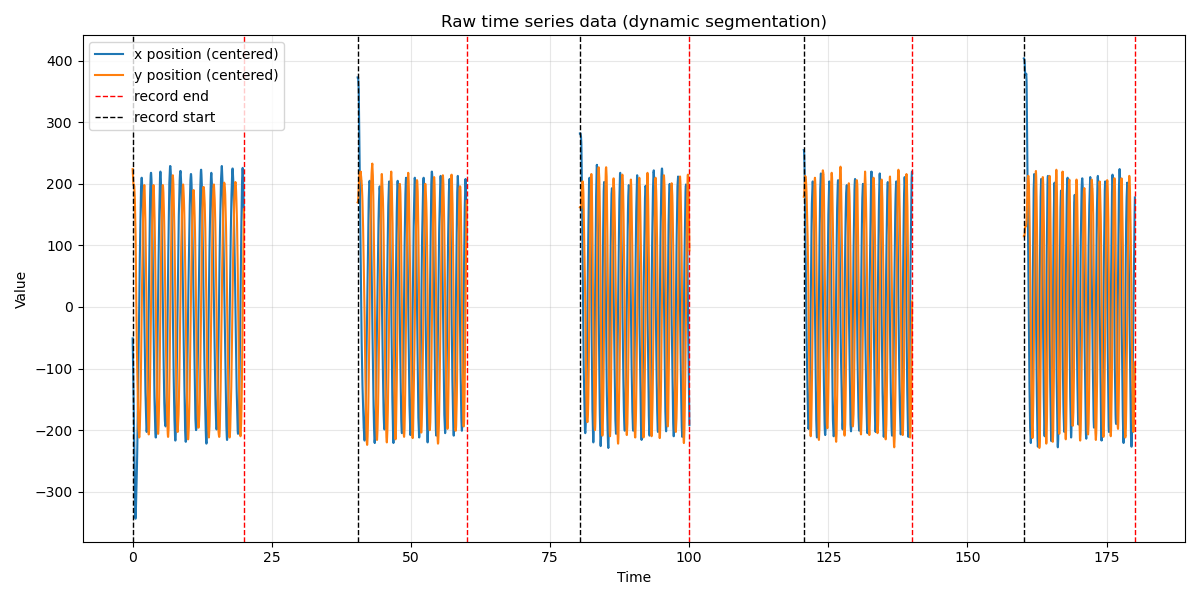

In [35]:
import numpy as np
import matplotlib.pyplot as plt

file = "./data/001MoDe_R1.csv"

CENTER_X = 552
CENTER_Y = 330

timestamps = []
mouseX_list = []
mouseY_list = []


with open(file, 'r') as f:
    lines = f.readlines()
    for i in range(1, len(lines)):
        line = lines[i].strip()
        if not line:
            continue
        parts = line.split(',')
        if len(parts) >= 3:
            try:
                ts = int(parts[0])
                mx = float(parts[1])
                my = float(parts[2])
                timestamps.append(ts)
                mouseX_list.append(mx)
                mouseY_list.append(my)
            except:
                continue

timestamp = np.array(timestamps, dtype=np.int64)
mouseX = np.array(mouseX_list)
mouseY = np.array(mouseY_list)

mouseX_centered = mouseX - CENTER_X
mouseY_centered = mouseY - CENTER_Y


def find_segments(ts):
    segments = []
    start = None

    if ts[0] > 0:
        start = 0

    for i in range(1, len(ts)):
        if ts[i-1] == 0 and ts[i] > 0:
            start = i

        if ts[i] == 0 and start is not None:
            segments.append((start, i))
            start = None

    if start is not None:
        segments.append((start, len(ts)))

    return segments



segments = find_segments(timestamp)



def extract_segment(start_idx, end_idx):
    return (
        timestamp[start_idx:end_idx],
        mouseX_centered[start_idx:end_idx],
        mouseY_centered[start_idx:end_idx]
    )


plt.figure(figsize=(12, 6))

first = True
for i, (start, end) in enumerate(segments):
    ts_seg, x_seg, y_seg = extract_segment(start, end)

    ts_seg = np.where(ts_seg == 0, np.nan, ts_seg)

    t_rel_global = (ts_seg - timestamp[0]) / 1000.0

    if first:
        plt.plot(t_rel_global, x_seg, color="tab:blue", linewidth=1.5, label="x position (centered)")
        plt.plot(t_rel_global, y_seg, color="tab:orange", linewidth=1.5, label="y position (centered)")
        first = False
    else:
        plt.plot(t_rel_global, x_seg, color="tab:blue", linewidth=1.5)
        plt.plot(t_rel_global, y_seg, color="tab:orange", linewidth=1.5)


valid_ts_indices = np.where(timestamp != 0)[0]
if len(valid_ts_indices) > 0:
    first_valid_idx = valid_ts_indices[0]
    t_first_valid = (timestamp[first_valid_idx] - timestamp[0]) / 1000.0
    plt.axvline(x=t_first_valid, color='black', linestyle='--', linewidth=1)


zero_indices = np.where(timestamp == 0)[0]

record_start_added = False
record_end_added = False

for idx in zero_indices:
    prev_idx = idx - 1
    next_idx = idx + 1

    if prev_idx >= 0:
        t_black = (timestamp[prev_idx] - timestamp[0]) / 1000.0
        if not record_end_added:
            plt.axvline(x=t_black, color='red', linestyle='--', linewidth=1, label="record end")
            record_end_added = True
        else:
            plt.axvline(x=t_black, color='red', linestyle='--', linewidth=1)

    if next_idx < len(timestamp):
        t_red = (timestamp[next_idx] - timestamp[0]) / 1000.0
        if not record_start_added:
            plt.axvline(x=t_red, color='black', linestyle='--', linewidth=1, label="record start")
            record_start_added = True
        else:
            plt.axvline(x=t_red, color='black', linestyle='--', linewidth=1)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Raw time series data (dynamic segmentation)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


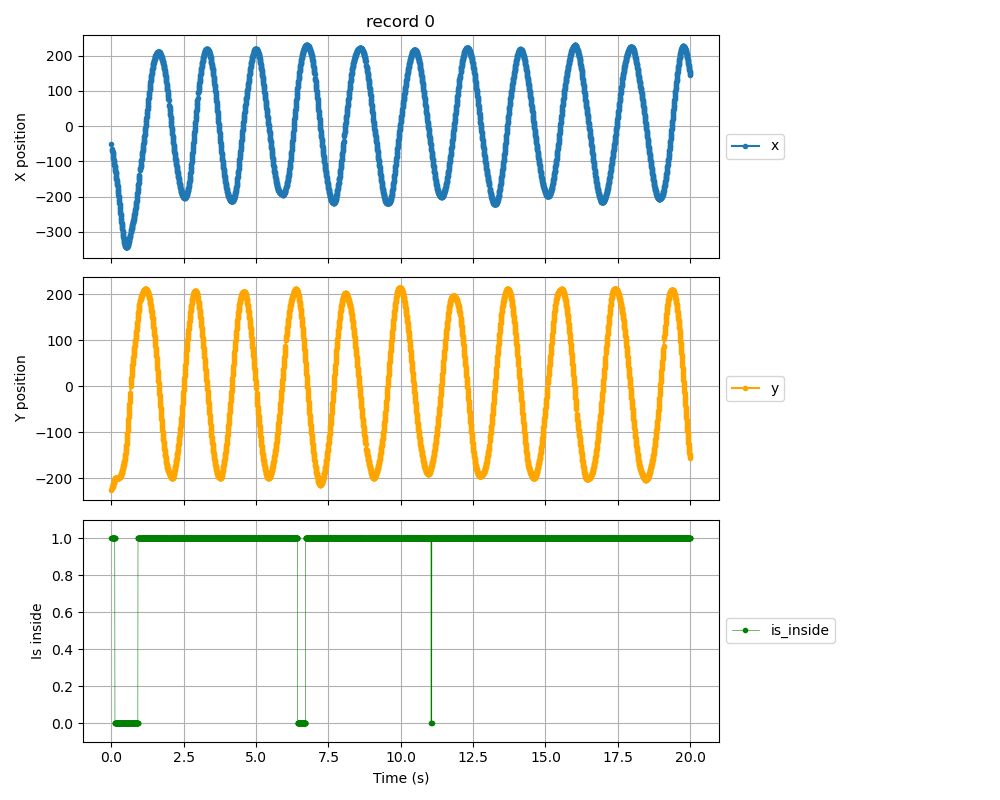

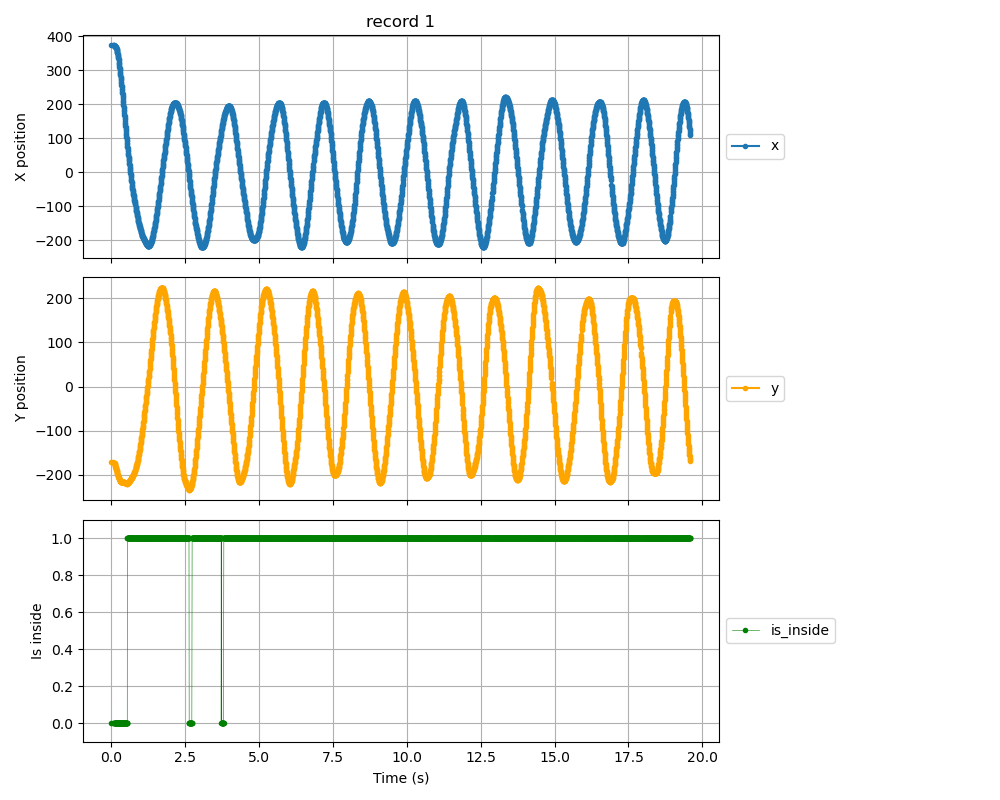

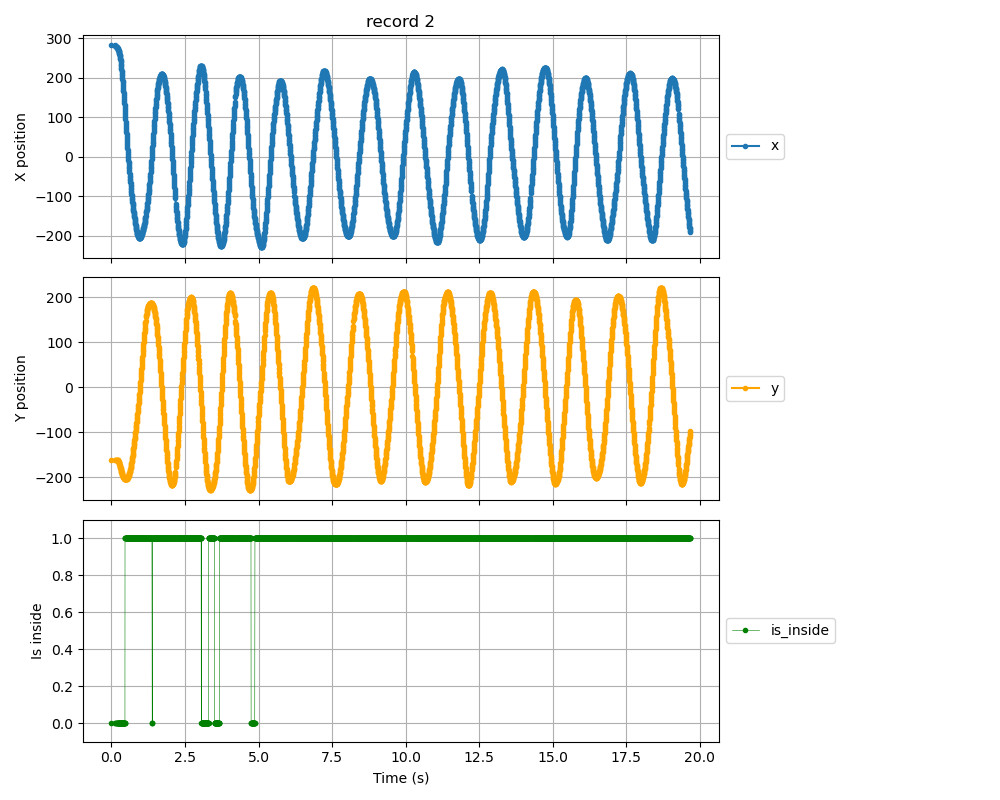

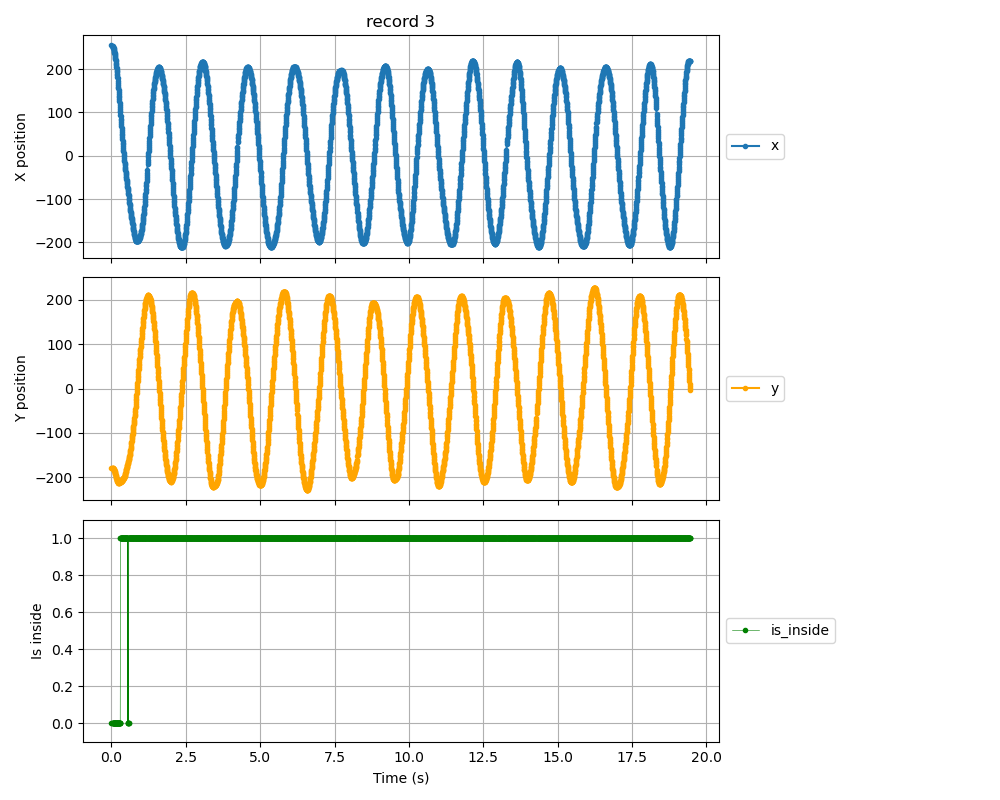

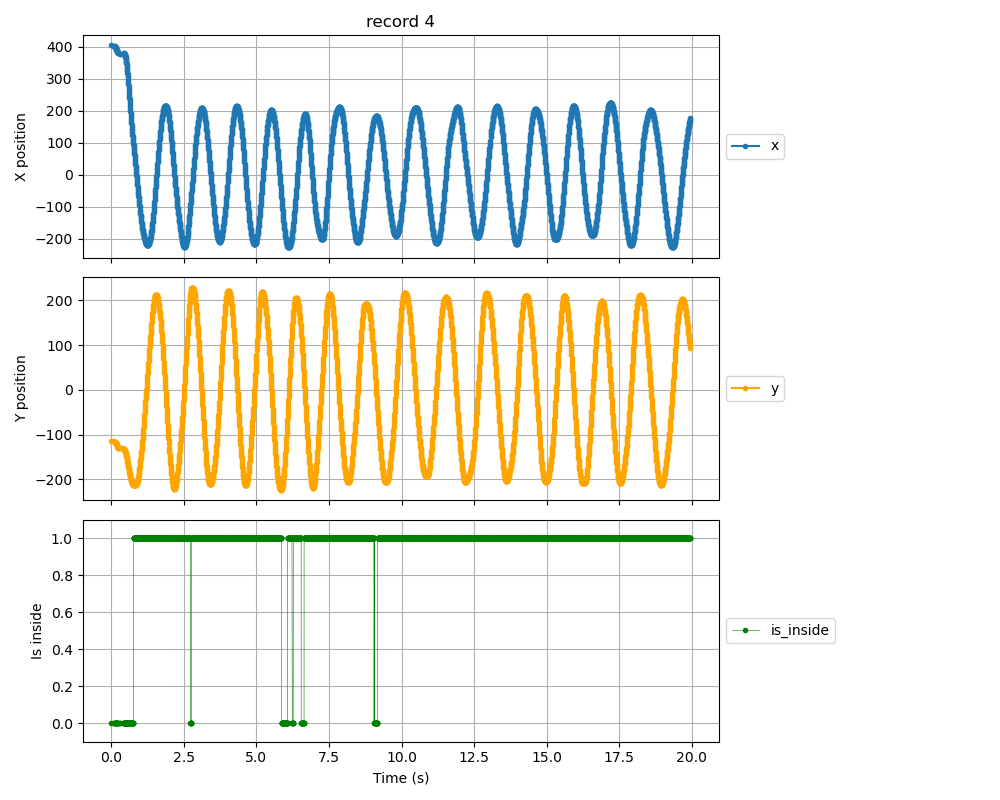

In [36]:
import numpy as np
import matplotlib.pyplot as plt

FILE = "./data/001MoDe_R1.csv"

full_data = np.genfromtxt(FILE, delimiter=',', skip_header=3, names=True)

data = full_data[['timestamp', 'mouseX', 'mouseY', 'mouseInTarget']]

CENTER_X = 552
CENTER_Y = 330



def find_segments(data):
    ts = data["timestamp"]
    segments = []
    start = None

    if ts[0] > 0:
        start = 0

    for i in range(1, len(ts)):
        if ts[i-1] == 0 and ts[i] > 0:
            start = i
        
        if ts[i] == 0 and start is not None:
            segments.append((start, i))
            start = None

    if start is not None:
        segments.append((start, len(ts)))

    return segments


segments_indices = find_segments(data)



def process_segments(data_slice):
    Xc = data_slice['mouseX'] - CENTER_X
    Yc = data_slice['mouseY'] - CENTER_Y

    t0 = data_slice['timestamp'][0]
    T_full = (data_slice['timestamp'] - t0) / 1000.0

    MT = data_slice['mouseInTarget']

    diff_ts = np.diff(data_slice['timestamp'])
    progress_idx = np.where(diff_ts > 0)[0]

    if len(progress_idx) > 0:
        last_valid = progress_idx[-1] + 1
    else:
        last_valid = len(data_slice)

    return (
        T_full[:last_valid],
        Xc[:last_valid],
        Yc[:last_valid],
        MT[:last_valid]
    )


segments = [process_segments(data[start:end]) for start, end in segments_indices]



def plot_segment(T, X, Y, target, segment_number):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

    ax1.plot(T, X, linestyle='-', marker=".", label="x")
    ax1.set_ylabel("X position")
    ax1.set_title(f"record {segment_number - 1}")
    ax1.grid(True)
    ax1.legend(loc="center left", bbox_to_anchor=(1, 0.5))


    ax2.plot(T, -Y, linestyle='-', marker=".", color='orange', label="y")
    ax2.set_ylabel("Y position")
    ax2.grid(True)
    ax2.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    ax3.plot(T, target, linestyle='-', marker=".", linewidth=0.4, color='green', label="is_inside")
    ax3.set_xlabel("Time (s)")
    ax3.set_ylabel("Is inside")
    ax3.set_ylim(-0.1, 1.1)
    ax3.grid(True)
    ax3.legend(loc="center left", bbox_to_anchor=(1, 0.5))

    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

for i, (T, X, Y, trg) in enumerate(segments, start=1):
    plot_segment(T, X, Y, trg, i)
